In [1]:
#import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import skimage
import random
from skimage import transform
import time

from matplotlib.colors import NoNorm
from vizdoom import *

In [2]:
#load the game
game = DoomGame()
game.load_config("basic.cfg")
game.init()

shoot = [0, 0, 1]
left = [1, 0, 0]
right = [0, 1, 0]
actions = [shoot, left, right]


In [3]:
#This function converts a single frame to grayscale and crops useful parts
def preproc_frame(frame):
    return skimage.transform.resize(
        ((frame.mean(axis=-1,keepdims=1)).squeeze()[30:-10,10:-10])/255.0,
        [128, 128], 
        anti_aliasing=True,
        mode='reflect'
    )


In order to learn all the information about the environment, we need to get more than a single frame. Only then can velocity be computed, for instance. Here we create a stack of 4 image frames.

In [4]:
from collections import deque
stack_size = 4 

def stack_frames(stacked_frames, raw_frame, new_ep):
    ##Input Args:
        # stacked_frames: current deque of frames
        # raw_frame: the color/unedited frame that we pass to be preprocessed
        # new_ep: boolean indicates whether we should make a new stack frame
    
    # Preprocess frame
    frame = preproc_frame(raw_frame)
    
    if new_ep:
        # Clear existing stacked_frames
        stacked_frames = deque([np.zeros((84,84), dtype=np.int) for i in range(stack_size)], maxlen=4)
        
        # Because we're in a new episode, copy the same frame 4x
        stacked_frames.append(frame)
        stacked_frames.append(frame)
        stacked_frames.append(frame)
        stacked_frames.append(frame)
        
        # Stack the frames
        stacked_state = np.stack(stacked_frames, axis=2)
        
    else:
        # Append frame to deque, automatically removes the oldest frame
        stacked_frames.append(frame)

        # Build the stacked state (first dimension specifies different frames)
        stacked_state = np.stack(stacked_frames, axis=2) 
    
    return stacked_state, stacked_frames

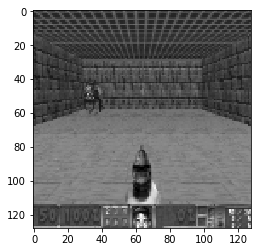

In [16]:
game.new_episode()
# state = game.get_state()

# Initialize deque with zero-images one array for each image
stacked_frames  =  deque([np.zeros((84,84), dtype=np.int) for i in range(stack_size)], maxlen=4) 

state = np.transpose(game.get_state().screen_buffer, (1,2,0))

stacked_state, stacked_frames = stack_frames(stacked_frames, state, True)

# plt.imshow(stacked_frames[0])
# plt.imshow(stacked_frames[0], cmap='gray')

